# Exploratory Analysis of Training Data LHC18
**Basic info**

*LHC18f, LHC18o, LHC18p - proton-proton*

LHC18q i LHC18r are PbPb and are not used

In [0]:
# Data managment 
import pandas as pd 
import numpy as np 

#Visualisation and statistics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#Additional
import pickle
import os

## Load Data


In [8]:
#Get RAW Data from CERN website
if not os.path.isfile('trending_merged_LHC18f_withGraphs.csv'):
    if not os.path.isfile('CERNdata.zip'):
        !wget 'https://cernbox.cern.ch/index.php/s/JnxbQZ0nzITGC4i/download' -O CERNdata.zip
    !7z x CERNdata.zip

--2019-12-17 17:59:35--  https://cernbox.cern.ch/index.php/s/JnxbQZ0nzITGC4i/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.32.38, 128.142.32.26
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.32.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘CERNdata.zip’

CERNdata.zip            [            <=>     ]   1.33G  8.86MB/s    in 3m 46s  

2019-12-17 18:03:24 (6.05 MB/s) - ‘CERNdata.zip’ saved [1432985088]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1432985088 bytes (1367 MiB)

Extracting archive: CERNdata.zip
CERNdata.zip
Can not open the file as [zip] archive
The file is open as [tar] archive

--
Path = CERNdata.zip
Open WARNING: Can not open the file as 

In [0]:
#Proton-Proton
raw_f = pd.read_csv('trending_merged_LHC18f_withGraphs.csv')
raw_o = pd.read_csv('trending_merged_LHC18o_withGraphs.csv')
raw_p = pd.read_csv('trending_merged_LHC18p_withGraphs.csv')

In [10]:
# Merge data and throw out all the garbage information
raw_full = pd.concat([raw_f, raw_o, raw_p])
raw_full.head()

,Unnamed: 0,run,chunkID,time,year,period.fString,pass.fString,dataType.fString,startTimeGRP,stopTimeGRP,duration,bz,runType.fString,meanTPCnclF,rmsTPCnclF,meanTPCChi2,rmsTPCChi2,slopeATPCnclF,slopeCTPCnclF,slopeATPCnclFErr,slopeCTPCnclFErr,meanTPCncl,rmsTPCncl,slopeATPCncl,slopeCTPCncl,slopeATPCnclErr,slopeCTPCnclErr,hasRawQA,rawClusterCounter,rawSignalCounter,offsetdZA,slopedZA,offsetdZC,slopedZC,offsetdZAErr,slopedZAErr,offsetdZCErr,slopedZCErr,offsetdZAchi2,slopedZAchi2,...,grdcaz_neg_CSidePhi_Y_105,grdcaz_neg_CSidePhi_Y_106,grdcaz_neg_CSidePhi_Y_107,grdcaz_neg_CSidePhi_Y_108,grdcaz_neg_CSidePhi_Y_109,grdcaz_neg_CSidePhi_Y_110,grdcaz_neg_CSidePhi_Y_111,grdcaz_neg_CSidePhi_Y_112,grdcaz_neg_CSidePhi_Y_113,grdcaz_neg_CSidePhi_Y_114,grdcaz_neg_CSidePhi_Y_115,grdcaz_neg_CSidePhi_Y_116,grdcaz_neg_CSidePhi_Y_117,grdcaz_neg_CSidePhi_Y_118,grdcaz_neg_CSidePhi_Y_119,grdcaz_neg_CSidePhi_Y_120,grdcaz_neg_CSidePhi_Y_121,grdcaz_neg_CSidePhi_Y_122,grdcaz_neg_CSidePhi_Y_123,grdcaz_neg_CSidePhi_Y_124,grdcaz_neg_CSidePhi_Y_125,grdcaz_neg_CSidePhi_Y_126,grdcaz_neg_CSidePhi_Y_127,grdcaz_neg_CSidePhi_Y_128,grdcaz_neg_CSidePhi_Y_129,grdcaz_neg_CSidePhi_Y_130,grdcaz_neg_CSidePhi_Y_131,grdcaz_neg_CSidePhi_Y_132,grdcaz_neg_CSidePhi_Y_133,grdcaz_neg_CSidePhi_Y_134,grdcaz_neg_CSidePhi_Y_135,grdcaz_neg_CSidePhi_Y_136,grdcaz_neg_CSidePhi_Y_137,grdcaz_neg_CSidePhi_Y_138,grdcaz_neg_CSidePhi_Y_139,grdcaz_neg_CSidePhi_Y_140,grdcaz_neg_CSidePhi_Y_141,grdcaz_neg_CSidePhi_Y_142,grdcaz_neg_CSidePhi_Y_143,interactionRate
0,0,287000,1,1527204124,2018,LHC18f,pass1,NaN,1527204124,1527231797,27673,-0.499998,PHYSICS,0.913711,0.091254,1.767776,0.446999,-0.003785,0.000947,0.000674,0.000947,133.596942,22.675932,-0.061015,-0.029429,0.172744,-0.029429,1,367302864,547136439,0.008433,0.061533,-0.095885,0.060379,0.002402,0.005589,0.002441,0.005575,54.538913,54.538913,...,-0.055711,-0.052315,-0.058496,-0.057705,-0.007200,-0.066442,-0.079369,-0.117361,-0.061361,-0.099326,-0.078831,-0.097516,-0.107208,-0.109287,-0.102642,-0.066415,-0.069376,-0.061681,-0.096441,-0.055511,-0.059102,-0.068315,-0.102027,-0.086352,-0.070171,-0.066603,-0.059391,-0.111429,-0.073658,-0.090766,-0.029640,-0.084562,-0.079724,-0.069284,-0.045167,-0.065301,-0.050480,-0.050551,-0.069094,195584.670984
1,1,287000,2,1527204124,2018,LHC18f,pass1,NaN,1527204124,1527231797,27673,-0.499998,PHYSICS,0.913795,0.091471,1.765181,0.446966,-0.004339,0.000274,0.000660,0.000274,133.604316,22.668970,-0.227194,-0.046269,0.170329,-0.046269,1,367302864,547136439,0.007302,0.050437,0.041850,0.239221,0.002347,0.005482,0.002514,0.005686,80.242746,80.242746,...,-0.000234,-0.013811,-0.043341,-0.036767,-0.008760,-0.059732,-0.010744,-0.024306,-0.056385,-0.063628,-0.059174,-0.067915,-0.013919,-0.018712,-0.042576,-0.029183,-0.065051,-0.074004,-0.062315,-0.098015,-0.032065,-0.039085,-0.037202,-0.020365,-0.052420,-0.092947,-0.017293,-0.044535,-0.009809,-0.026729,-0.048561,-0.006055,-0.034508,-0.051278,-0.038319,0.017724,0.012698,-0.032471,-0.020261,195584.670984
2,2,287000,3,1527204124,2018,LHC18f,pass1,NaN,1527204124,1527231797,27673,-0.499998,PHYSICS,0.913980,0.091291,1.766238,0.447530,-0.003400,0.000098,0.000655,0.000098,133.619454,22.658997,-0.226418,-0.220931,0.169301,-0.220931,1,367302864,547136439,0.018170,0.035006,0.122846,0.356713,0.002312,0.005374,0.002513,0.005630,84.160363,84.160363,...,-0.047265,-0.005258,0.001520,-0.004679,0.067023,0.020974,-0.022892,-0.021963,-0.054784,-0.065607,-0.046039,-0.033981,-0.057274,-0.023231,-0.018649,0.002054,-0.031758,-0.085111,-0.042000,0.024556,-0.053818,-0.004125,-0.005745,0.006034,-0.042845,-0.028715,0.006710,-0.015597,-0.024007,-0.001764,-0.029742,-0.010322,-0.021278,0.031273,0.034793,0.030032,0.017758,-0.000799,0.018394,195584.670984
3,3,287000,4,1527204124,2018,LHC18f,pass1,NaN,1527204124,1527231797,27673,-0.499998,PHYSICS,0.913710,0.091409,1.769212,0.448276,-0.003525,-0.000843,0.000665,-0.000843,133.561797,22.654738,-0.160837,-0.230723,0.169628,-0.230723,1,367302864,547136439,0.010970,0.

## Merge Data and Filter Out The Trash
**Basic filtering**

In [11]:
#Define meta data, graphs, aliases
meta_cols = ['run', 'chunkID', 'time', 'year', 'period.fString', 'pass.fString', 
'runType.fString', 'startTimeGRP', 'stopTimeGRP', 'duration', 'chunkStart', 
'chunkStop', 'chunkMean', 'chunkMedian', 'chunkRMS', 
'chunkDuration'] + ['Unnamed: 0', 'dataType.fString' ] 

graph_cols = [col for col in raw_full if col.startswith('gr')] 
alias_cols = [col for col in raw_full if col.startswith('alias_')] 

#Point to label columns
war_col = 'alias_global_Warning'
out_col = 'alias_global_Outlier'

# Filter out data not used for classification.
data = raw_full.drop(meta_cols + graph_cols + alias_cols, axis=1)
no_samples, no_features = data.shape

#Create vector with labels
labels = raw_full[war_col]

#Check shape
print(no_samples, no_features)

3429 239


**Find values that have no variation (all same values) and drop them**



In [12]:
#They were already found, here is just quick proof, all are empty wth zeros.
#Drop redundant
feat_w_no_variation = ['offsetdRCErr' , 'slopedRCErr', 'offsetdRCErrPos', 'slopedRCErrPos', 'offsetdRCErrNeg', 'slopedRCErrNeg']
for feat in feat_w_no_variation:
    print(data[feat].value_counts())

data = data.drop(feat_w_no_variation, axis=1)
no_samples, no_features = data.shape

print('\n')
print(no_samples, no_features)
data.head()

0.0    3429
Name: offsetdRCErr, dtype: int64
0.0    3429
Name: slopedRCErr, dtype: int64
0.0    3429
Name: offsetdRCErrPos, dtype: int64
0.0    3429
Name: slopedRCErrPos, dtype: int64
0.0    3429
Name: offsetdRCErrNeg, dtype: int64
0.0    3429
Name: slopedRCErrNeg, dtype: int64


3429 233


,bz,meanTPCnclF,rmsTPCnclF,meanTPCChi2,rmsTPCChi2,slopeATPCnclF,slopeCTPCnclF,slopeATPCnclFErr,slopeCTPCnclFErr,meanTPCncl,rmsTPCncl,slopeATPCncl,slopeCTPCncl,slopeATPCnclErr,slopeCTPCnclErr,hasRawQA,rawClusterCounter,rawSignalCounter,offsetdZA,slopedZA,offsetdZC,slopedZC,offsetdZAErr,slopedZAErr,offsetdZCErr,slopedZCErr,offsetdZAchi2,slopedZAchi2,offsetdZCchi2,slopedZCchi2,offsetdZAPos,slopedZAPos,offsetdZCPos,slopedZCPos,offsetdZAErrPos,slopedZAErrPos,offsetdZCErrPos,slopedZCErrPos,offsetdZAchi2Pos,slopedZAchi2Pos,...,oroc_C_side,MIPattachSlopeC,MIPattachSlopeA,resolutionMIP,meanMIP,meanMIPele,resolutionMIPele,electroMIPSeparation,tpcItsMatchA,tpcItsMatchHighPtA,tpcItsMatchC,tpcItsMatchHighPtC,phiPull,phiPullHighPt,ptPull,ptPullHighPt,yPull,yPullHighPt,zPull,zPullHighPt,lambdaPull,lambdaPullHighPt,tpcConstrainPhiA,tpcConstrainPhiC,meanPTRelativeA,medianPTRelativeA,rmsPTRelativeA,meanPTRelativeC,medianPTRelativeC,rmsPTRelativeC,meanHVandPTGainCorrIROC,medianHVandPTGainCorrIROC,rmsHVandPTGainCorrIROC,meanHVandPTGainCorrOROC,medianHVandPTGainCorrOROC,rmsHVandPTGainCorrOROC,meanVDriftCorr,medianVDriftCorr,rmsVDriftCorr,interactionRate
0,-0.499998,0.913711,0.091254,1.767776,0.446999,-0.003785,0.000947,0.000674,0.000947,133.596942,22.675932,-0.061015,-0.029429,0.172744,-0.029429,1,367302864,547136439,0.008433,0.061533,-0.095885,0.060379,0.002402,0.005589,0.002441,0.005575,54.538913,54.538913,1447.258711,1447.258711,0.011558,0.084150,-0.093813,0.087700,0.003431,0.008177,0.003531,0.008089,9.050547,9.050547,...,18,0.030036,-0.173266,0.064220,49.792557,80.735855,0.055183,30.943298,0.699384,0.710692,0.694623,0.703207,-0.000119,-0.000389,0.527906,0.738438,-0.092014,-0.210392,-0.088328,-0.156770,0.119385,0.068962,0.017818,-0.049315,0.003437,0.003433,0.000011,0.003560,0.003556,0.000011,1.128413,1.128399,0.000043,1.128413,1.128399,0.000043,-0.027221,-0.027222,3.005739e-06,195584.670984
1,-0.499998,0.913795,0.091471,1.765181,0.446966,-0.004339,0.000274,0.000660,0.000274,133.604316,22.668970,-0.227194,-0.046269,0.170329,-0.046269,1,367302864,547136439,0.007302,0.050437,0.041850,0.239221,0.002347,0.005482,0.002514,0.005686,80.242746,80.242746,2298.826852,2298.826852,0.006364,0.079816,0.040957,0.262827,0.003490,0.008128,0.003665,0.008344,35.407343,35.407343,...,18,-0.046077,-0.174695,0.064034,49.808353,80.820270,0.055974,31.011913,0.698263,0.696498,0.692948,0.703005,-0.000016,0.001378,0.533350,0.784235,-0.053545,-0.088791,-0.077231,-0.174282,0.118407,0.125998,0.008589,-0.031984,0.003476,0.003474,0.000017,0.003597,0.003596,0.000017,1.128563,1.128559,0.000066,1.128563,1.128559,0.000066,-0.027226,-0.027226,8.138511e-07,195584.670984
2,-0.499998,0.913980,0.091291,1.766238,0.447530,-0.003400,0.000098,0.000655,0.000098,133.619454,22.658997,-0.226418,-0.220931,0.169301,-0.220931,1,367302864,547136439,0.018170,0.035006,0.122846,0.356713,0.002312,0.005374,0.002513,0.005630,84.160363,84.160363,2689.649719,2689.649719,0.018739,0.060694,0.122070,0.383957,0.003383,0.007934,0.003700,0.008220,64.929950,64.929950,...,18,-0.040411,-0.132918,0.063939,49.698433,80.666520,0.055939,30.968086,0.700643,0.707197,0.693301,0.706140,-0.000104,0.000041,0.534116,0.760895,-0.058528,-0.119211,-0.078093,-0.172614,0.118760,0.088854,0.012813,-0.016630,0.003457,0.003462,0.000018,0.003578,0.003583,0.000018,1.128491,1.128508,0.000068,1.128491,1.128508,0.000068,-0.027230,-0.027230,2.510162e-06,195584.670984
3,-0.499998,0.913710,0.091409,1.769212,0.448276,-0.003525,-0.000843,0.000665,-0.000843,133.561797,22.654738,-0.160837,-0.230723,0.169628,-0.230723,1,367302864,547136439,0.010970,0.044343,0.186074,0.444474,0.002419,0.005634,0.002601,0.005870,60.973159,60.973159,2930.115067,2930.115067,0.011269,0.076198,0.189182,0.477827,0.003562,0.008437,0.003797,0.008594,38.295893,38.295893,...,18,-0.011914,-0.215666,0.064052,49.721306,80.747475,0.055767,31.026169,0.693546,0.691877,0.686828,0.708658,-0.000176,0.000900,0.535176,0.826308,-0.044240,-0.047569,-0.071471,-0.156174,0.111323,0.044026,0

## Exploratory data analysis
Some cool functions stolen from:

https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

In [13]:
# Getting key parameters of data 
data.describe()

,bz,meanTPCnclF,rmsTPCnclF,meanTPCChi2,rmsTPCChi2,slopeATPCnclF,slopeCTPCnclF,slopeATPCnclFErr,slopeCTPCnclFErr,meanTPCncl,rmsTPCncl,slopeATPCncl,slopeCTPCncl,slopeATPCnclErr,slopeCTPCnclErr,hasRawQA,rawClusterCounter,rawSignalCounter,offsetdZA,slopedZA,offsetdZC,slopedZC,offsetdZAErr,slopedZAErr,offsetdZCErr,slopedZCErr,offsetdZAchi2,slopedZAchi2,offsetdZCchi2,slopedZCchi2,offsetdZAPos,slopedZAPos,offsetdZCPos,slopedZCPos,offsetdZAErrPos,slopedZAErrPos,offsetdZCErrPos,slopedZCErrPos,offsetdZAchi2Pos,slopedZAchi2Pos,...,oroc_C_side,MIPattachSlopeC,MIPattachSlopeA,resolutionMIP,meanMIP,meanMIPele,resolutionMIPele,electroMIPSeparation,tpcItsMatchA,tpcItsMatchHighPtA,tpcItsMatchC,tpcItsMatchHighPtC,phiPull,phiPullHighPt,ptPull,ptPullHighPt,yPull,yPullHighPt,zPull,zPullHighPt,lambdaPull,lambdaPullHighPt,tpcConstrainPhiA,tpcConstrainPhiC,meanPTRelativeA,medianPTRelativeA,rmsPTRelativeA,meanPTRelativeC,medianPTRelativeC,rmsPTRelativeC,meanHVandPTGainCorrIROC,medianHVandPTGainCorrIROC,rmsHVandPTGainCorrIROC,meanHVandPTGainCorrOROC,medianHVandPTGainCorrOROC,rmsHVandPTGainCorrOROC,meanVDriftCorr,medianVDriftCorr,rmsVDriftCorr,interactionRate
count,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3.429000e+03,3.429000e+03,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,...,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3.429000e+03,3429.000000,3429.000000,3.429000e+03,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3.429000e+03,3429.000000,3429.000000,3.429000e+03,3429.000000
mean,0.171011,0.913251,0.094204,1.710615,0.456646,-0.010408,0.005862,0.000818,0.005862,133.358325,23.045097,-1.004954,0.609455,0.208992,0.609455,0.953339,8.601571e+08,1.316967e+08,-0.001512,0.052172,0.058249,0.263523,0.003325,0.007991,0.003679,0.008418,59.859438,59.859438,1446.425860,1446.425860,0.002563,0.066310,0.049046,0.255400,0.005248,0.012313,0.006301,0.013694,30.988245,30.988245,...,17.906970,-0.148477,-0.079308,0.063345,49.758013,80.649942,0.054825,30.987415,0.662375,0.675694,0.656232,0.668126,-0.000140,-0.000054,0.541757,0.765746,-0.066831,-0.121737,-0.064345,-0.157174,0.121412,0.071384,0.008231,0.023407,0.001510,0.001510,2.656213e-05,0.001581,0.001581,2.656837e-05,1.120892,1.120893,0.000107,1.097549,1.097549,1.017374e-04,-0.016285,-0.016285,1.148293e-05,243080.963469
std,0.469882,0.003484,0.002469,0.036309,0.013737,0.004715,0.004163,0.000682,0.004163,0.640159,0.375913,0.717901,0.721128,0.182399,0.721128,0.210942,9.402232e+08,1.239814e+09,0.013216,0.017386,0.040509,0.063490,0.002835,0.006718,0.004557,0.009123,62.313643,62.313643,953.985432,953.985432,0.014601,0.023862,0.041735,0.064719,0.006531,0.012135,0.010875,0.022175,31.621886,31.621886,...,0.290517,0.137916,1.823764,0.001327,0.205822,4.137477,0.018581,3.514540,0.040201,0.039131,0.039073,0.037675,0.000196,0.001199,0.019974,0.069864,0.020727,0.077283,0.017516,0.030347,0.012930,0.047049,0.004585,0.036299,0.005381,0.005381,2.565586e-05,0.005392,0.005392,2.565719e-05,0.021001,0.021000,0.000242,0.033082,0.033082,9.868001e-05,0.006182,0.006182,1.187241e-05,76540.214832
min,-0.499998,0.886386,0.085301,1.568714,0.394483,-0.026781,-0.021426,0.000236,-0.021426,128.683049,21.659032,-6.714845,-4.442370,0.058318,-4.442370,0.000000,-2.111263e+09,-2.115664e+09,-0.193927,-0.103972,-0.410351,-0.537703,0.000544,0.001221,0.000531,0.001187,0.808091,0.808091,3.009093,3.009093,-0.190440,-0.270116,-0.

0.0    3262
1.0     167
Name: alias_global_Warning, dtype: int64


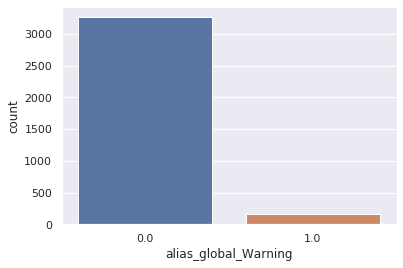

In [18]:
#Show outlier proportion on histogram 
print(labels.value_counts()) 
sns.countplot(labels);
#plt.savefig('label_ration.png')

## Correlation

**Inspect correlation of features with label.**


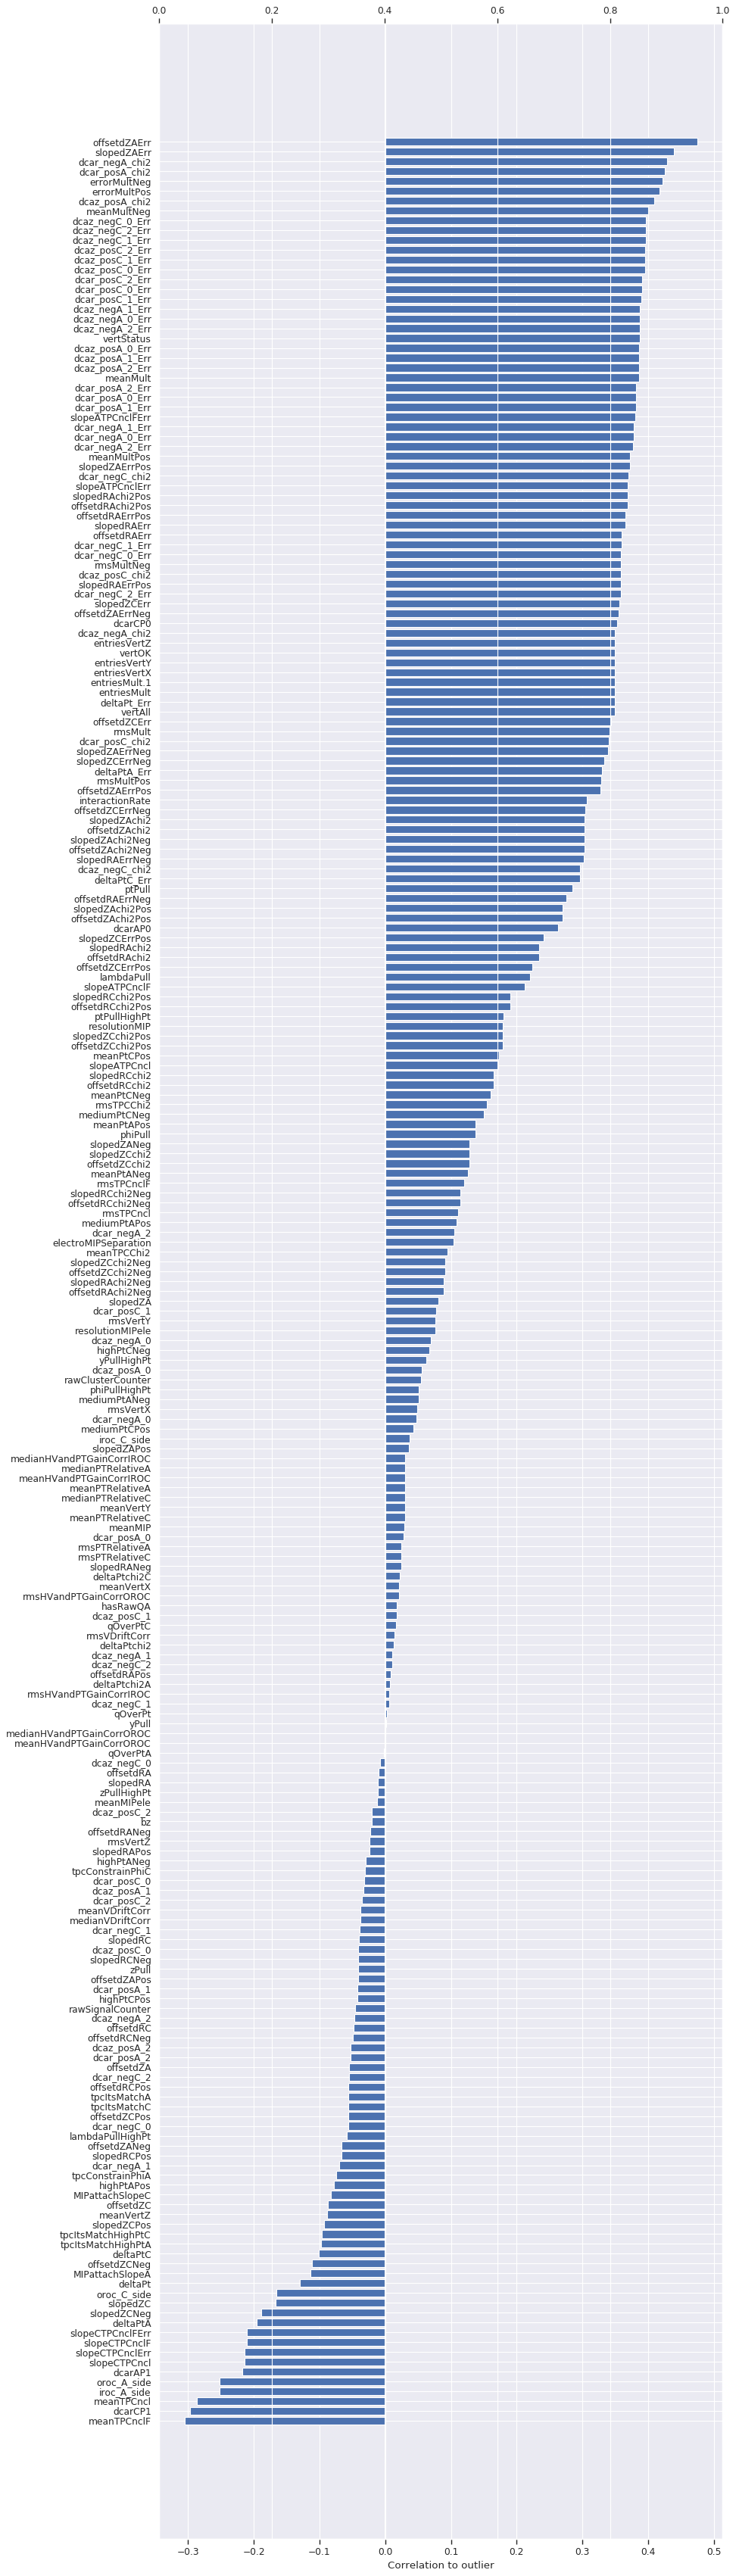

<Figure size 432x288 with 0 Axes>

In [19]:
corr_lab = [(feat, labels.corr(data[feat])) for feat in data.columns]
corr_lab = sorted(corr_lab, key = lambda tup: tup[1], reverse = False)

features = list(map(lambda tup: tup[0] , corr_lab))
corr_val = list(map(lambda tup: tup[1] , corr_lab))
l = np.arange(len(features))

fig = plt.figure(figsize=(12, 55), dpi= 80)
fig.tight_layout()
plt.barh(l,corr_val, align = 'center')
plt.yticks(l, features) 
plt.xlabel('Correlation to outlier')
plt.twiny()
plt.show()

**Inspect self correlation.**

In [16]:
#Create correlation matrix, take only abs values above 0.75 and order them
corr_all = data.corr()
corr = corr_all.where(~np.tril(np.ones(corr_all.shape)).astype(np.bool))

corr_high = corr[abs(corr) > 0.75]
corr_all_pairs = corr_all.unstack().sort_values(ascending = False).dropna()
corr_high_pairs = corr_high.unstack().sort_values(ascending = False).dropna()

#Get list of redundant features (one of pair from corr matrix) and delete repetitions
corr_keys = list(dict.fromkeys([i[0] for i in corr_high_pairs.index]))
#Show number of redundant columns 
print(len(corr_keys))

163


163 / 233 features are highly corelated with other features.

Further anlysis is necessary, reduction in features number may be good idea.

**Visualise points with high values of correlation**
Cut those below diagonal

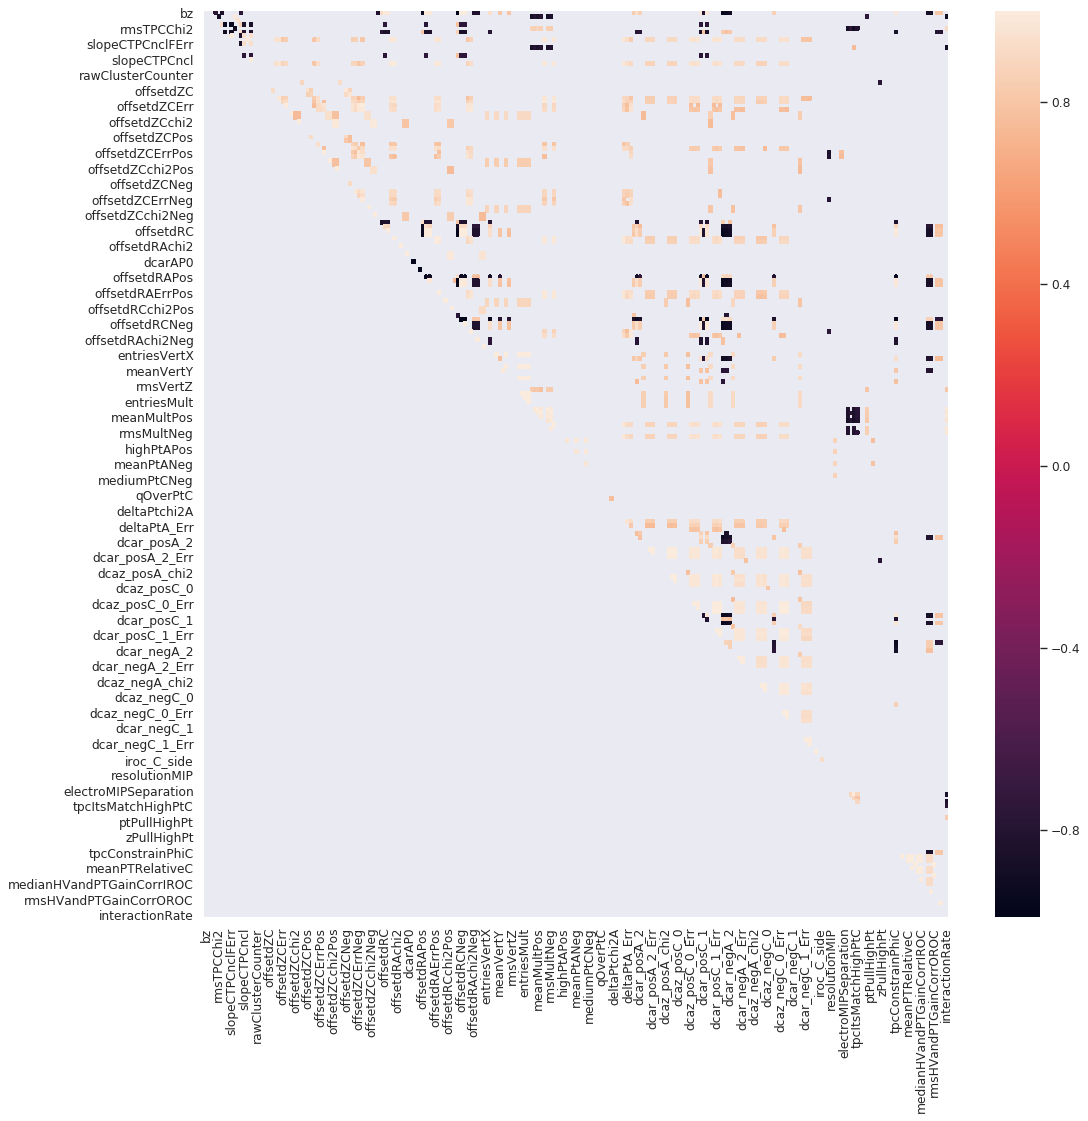

In [20]:
fig = plt.figure(figsize=(15, 15), dpi= 80)
sns.heatmap(corr_high);
#plt.savefig('correlation.png')